# Ground truth recordings for validation of spike sorting algorithms

@author : Samuel Garcia


Giulia  Spampinato from Institut de la Vision, Paris, have publish data from mice retina recorded invitro with from dense array.
The data contain one ground truth to benchmark spike sorting tools. The ground truth is recorded with juxta celullar pipet.

Here the official publication of this open dataset:
https://zenodo.org/record/1205233#.W9mq1HWLTIF


This datasets was used by Pierre Yger publish spyking circus:
https://elifesciences.org/articles/34518

After inspecting the juxta cellular, some recordings of the juxta cellular itself have no a good enough quality to be a "ground truth". To be a "ground truth" a recording must no doubt about the threhold, peak snr, amplitude stability.

At the end some files have been removed for the main study in **"sorter_comparison.ipynb"**.


Here some detail about that.

First, we have to run the script "detect_ground_truth_spike_on_juxta.py".

This script:
  * unzip everything
  * run a juxta cellular detection
  * generate figure to check manual juxta cellular quality
  * compute the peak snr on the max channelin the mea.

Before we need:
  * to create a folder **basedir** somwhere.
  * a subfolder **basedir/original_files** that contain all zip downloded (20160415_patch2.tar.gz, ...)

run the script detect_ground_truth_spike_on_juxta.py

After we can:
  * inscpect in each folder some figures.






# Cretirium to keep or remove a file

Having a very string ground truth is crucial because all following metrics for sorter will bias by the fact that ground truth could itself have False Negative or False Positive.


In the script we choose a hight threhold value for peak detection: **thresh = med + 8\*mad**
  * **med** been the median of the signal (the baseline)
  * **mad** been the median absolut deviation a robust std estimation
  * 8 is a quite high relative threshold thta ensure no noise at all.
  
  
Two main criteria to keep a recording:
  * the distribution of the peak value of the juxta celullar must look like a gaussian. Because:
     * troncated gaussian warn about been false negative (miss) in ground truth
     * multi modal guassian warn us about drift in amplitude or two cells




# List of kept recording (9)


```python
'20160415_patch2',
'20170803_patch1',
'20170623_patch1', 
'20170622_patch1',
'20160426_patch3', 
'20170725_patch1',
'20170621_patch1',
'20160426_patch2', 
'20170728_patch2'
```


# List of non kept recording (10)

```python
'20170706_patch2'
'20170713_patch1'
'20170629_patch2'
'20170622_patch2'
'20170726_patch1'
'20170706_patch1'
'20170706_patch3'
'20170627_patch1'
'20170630_patch1'
'20170629_patch3'
```

Some reader could find me too strict, I but I prefer safe final results.
Feel free to modify this list as you want you your own criteria.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# path
basedir = '/home/samuel/DataSpikeSorting/Pierre/zenodo/'
recording_folder = basedir + 'original_files/'
ground_truth_folder = basedir + 'ground_truth/'

In [32]:
# 2 simple functions

def get_juxta_filename(rec_name):
    # find the juxta file
    dirname = recording_folder + rec_name + '/'
    for f in os.listdir(dirname):
        if  f.endswith('juxta.raw'):
            juxta_filename = dirname + f
            return juxta_filename

def plot_juxta_amplitude(rec_name):
    juxta_filename = get_juxta_filename(rec_name)
    juxta_sig = np.memmap(juxta_filename, dtype='float32')
    
    med = np.median(juxta_sig)
    mad = np.median(np.abs(juxta_sig-med))*1.4826
    thresh = med + 8*mad
    
    
    gt_indexes = ground_truth_folder + 'juxta_peak_indexes.raw'
    gt_indexes = np.fromfile(ground_truth_folder + rec_name + '/juxta_peak_indexes.raw', dtype='int64')
    
    fig, ax = plt.subplots()
    count, bins = np.histogram(juxta_sig[gt_indexes], bins=np.arange(np.min(juxta_sig[gt_indexes]), 0,  0.5))
    ax.plot(bins[:-1], count)
    ax.axvline(-thresh, color='r', ls='--')
    ax.axvline(med, color='k', ls='-')
    for i in range(1,6):
        ax.axvspan(med - i * mad, med + i * mad, color='k', alpha=0.05)
    
    ax.set_title('juxta peak amplitude - ' + rec_name)



# Why some recording are are not kept


In following figures:
  * black vertical line is the basline of juxta cellular. 
  * grey area represent 1, 2, 3, 4, 5 MAD (=robust STD), so the noise
  * red line is the threshold


## Figure for 20170706_patch2

Here too few peaks cross the threhold

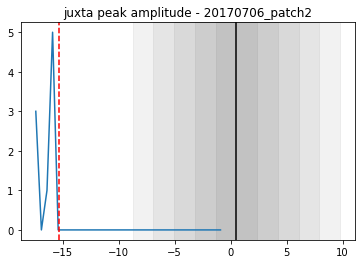

In [43]:
plot_juxta_amplitude('20170706_patch2')

## Figure for 20170713_patch1

Here a clear doucle gaussian, so suspicion of double cell

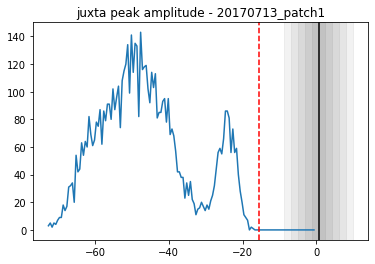

In [34]:
plot_juxta_amplitude('20170713_patch1')

## Figure for 20170629_patch2

Here peak amplitude distrib cross the threhold

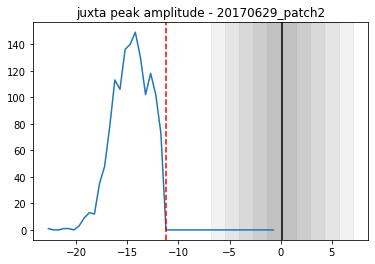

In [35]:
plot_juxta_amplitude('20170629_patch2')

## Figure for 20170622_patch2

Here peak amplitude distrib cross the threhold and too few peak

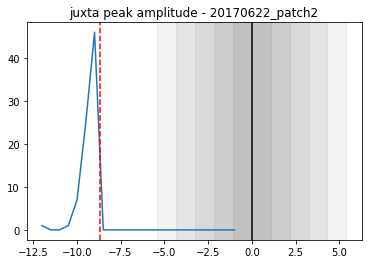

In [36]:
plot_juxta_amplitude('20170622_patch2')

## Figure for 20170726_patch1

Here peak amplitude distrib cross the threhold

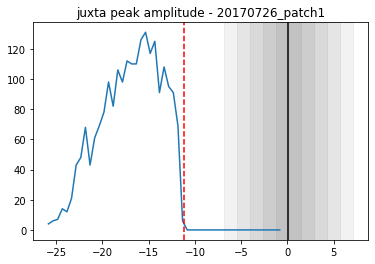

In [37]:
plot_juxta_amplitude('20170726_patch1')

## Figure for 20170706_patch1

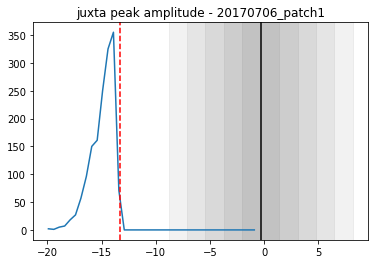

In [38]:
plot_juxta_amplitude('20170706_patch1')

## Figure for 20170706_patch3

Here peak amplitude distrib cross the threhold

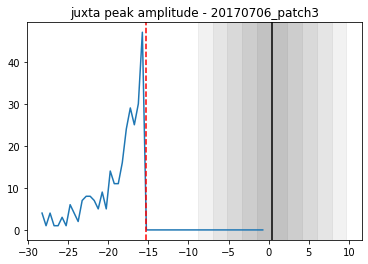

In [39]:
plot_juxta_amplitude('20170706_patch3')

## Figure for 20170627_patch1

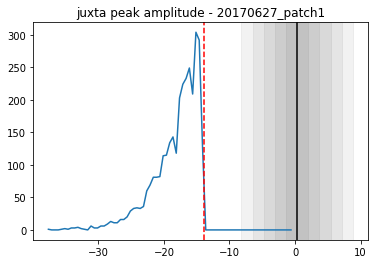

In [40]:
plot_juxta_amplitude('20170627_patch1')

## Figure for 20170630_patch1

Here double gaussian.
Here peak amplitude distrib cross the threhold.


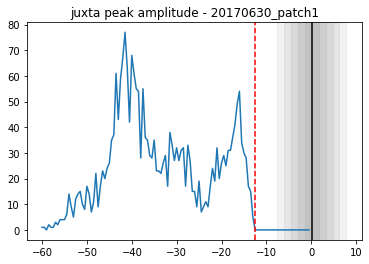

In [41]:
plot_juxta_amplitude('20170630_patch1')

## Figure for 20170629_patch3

Here peak amplitude distrib cross the threhold

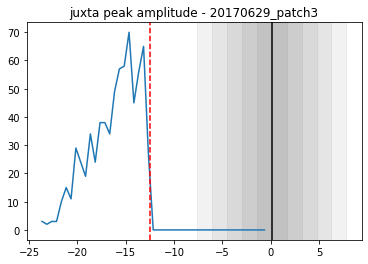

In [42]:
plot_juxta_amplitude('20170629_patch3')

# List of clean ground truth

## Figure for 20160415_patch2 : OK

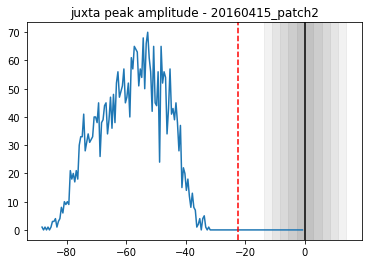

In [45]:
plot_juxta_amplitude('20160415_patch2')

## Figure for 20170803_patch1 : OK

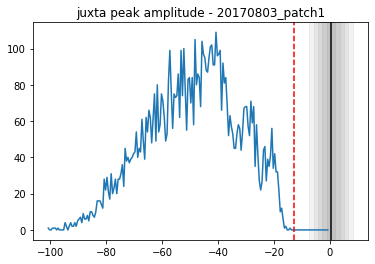

In [48]:
plot_juxta_amplitude('20170803_patch1')

## Figure for 20170623_patch1 : OK but bundaray

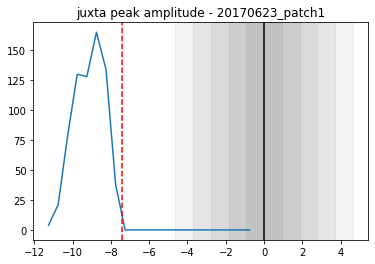

In [59]:
plot_juxta_amplitude('20170623_patch1')

## Figure for 20170622_patch1 : OK but bundary

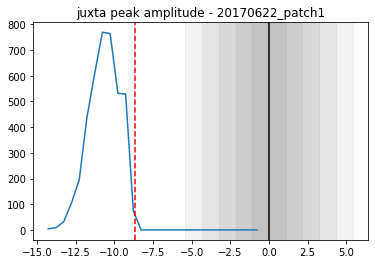

In [58]:
plot_juxta_amplitude('20170622_patch1')

## Figure for 20160426_patch3 : OK

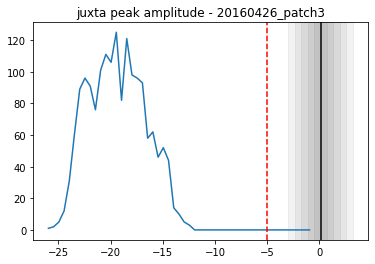

In [57]:
plot_juxta_amplitude('20160426_patch3')

## Figure for 20170725_patch1 : OK

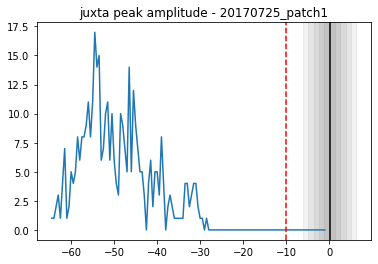

In [56]:
plot_juxta_amplitude('20170725_patch1')

## Figure for 20170621_patch1 : OK

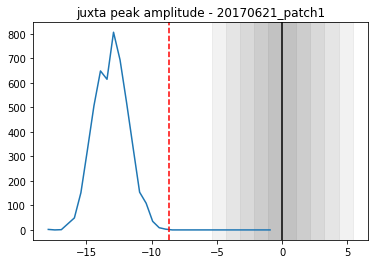

In [53]:
plot_juxta_amplitude('20170621_patch1')

## Figure for 20160426_patch2 : OK

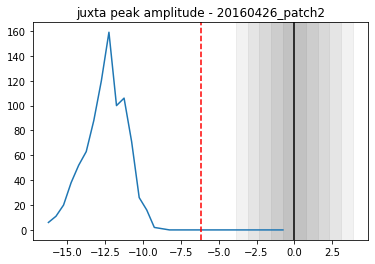

In [54]:
plot_juxta_amplitude('20160426_patch2')

## Figure for 20170728_patch2 : OK but bundary

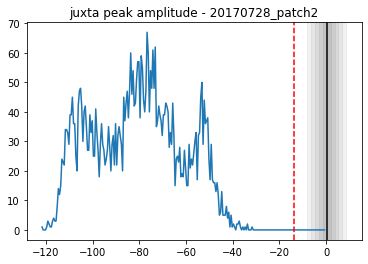

In [55]:
plot_juxta_amplitude('20170728_patch2')

In [ ]:
## Figure for 20170706_patch2

# Conclusion

  * 10 out of 19 files have been removed for further ground truth analysis.
  * 9 out of 19 files are kept for ground truth analysis.

For paired recording ground truth, the ground truth itself have to be carrefully veryfied.

The ground spike index provide by authors are not trustable.



